In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sklearn
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
from scipy.cluster.vq import kmeans, vq, whiten
from scipy.spatial.distance import cdist
import numpy as np
from datetime import datetime

In [4]:
metadata_path = "D:\Data's\metadata.csv"
weather_path = "D:\Data's\weather.csv"
energy_path = "D:\Data's\electricity_cleaned.csv"
df = pd.read_csv(energy_path, index_col='timestamp', parse_dates=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17544 entries, 2016-01-01 00:00:00 to 2017-12-31 23:00:00
Columns: 1578 entries, Panther_parking_Lorriane to Mouse_science_Micheal
dtypes: float64(1578)
memory usage: 211.3 MB


In [6]:
df.head()

,Panther_parking_Lorriane,Panther_lodging_Cora,Panther_office_Hannah,Panther_lodging_Hattie,Panther_education_Teofila,Panther_education_Jerome,Panther_retail_Felix,Panther_parking_Asia,Panther_education_Misty,Panther_retail_Gilbert,...,Cockatoo_public_Caleb,Cockatoo_education_Tyler,Cockatoo_public_Shad,Mouse_health_Buddy,Mouse_health_Modesto,Mouse_lodging_Vicente,Mouse_health_Justin,Mouse_health_Ileana,Mouse_health_Estela,Mouse_science_Micheal
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,123.200,727.575,69.200,8.8224,370.0870,10.0,282.9965,26.0,135.0,168.2243
2016-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,126.475,731.200,66.275,17.6449,737.8260,30.0,574.9265,51.0,265.0,336.4486
2016-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,127.825,724.675,64.675,17.6449,729.9255,30.0,570.2780,50.0,272.0,336.4486
2016-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,130.475,737.375,65.875,17.6449,722.2620,20.0,561.1470,52.0,276.0,336.4486
2016-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,129.675,721.150,66.275,17.6449,719.1665,30.0,564.3695,50.0,280.0,336.4486


In [7]:
#building_name = 'Panther_office_Lois'
building_name ='Panther_office_Catherine'

In [8]:
office_data = pd.DataFrame(df[building_name].truncate(before='2017-01-01'))
office_data.interpolate(method='nearest')

,Panther_office_Catherine
timestamp,
2017-01-01 00:00:00,17.6434
2017-01-01 01:00:00,18.3635
2017-01-01 02:00:00,17.8435
2017-01-01 03:00:00,18.6836
2017-01-01 04:00:00,17.6834
...,...
2017-12-31 19:00:00,71.0937
2017-12-31 20:00:00,74.0543
2017-12-31 21:00:00,64.2524


In [9]:
office_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2017-01-01 00:00:00 to 2017-12-31 23:00:00
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Panther_office_Catherine  8748 non-null   float64
dtypes: float64(1)
memory usage: 136.9 KB


In [10]:
office_data.head()

,Panther_office_Catherine
timestamp,
2017-01-01 00:00:00,17.6434
2017-01-01 01:00:00,18.3635
2017-01-01 02:00:00,17.8435
2017-01-01 03:00:00,18.6836
2017-01-01 04:00:00,17.6834


<Axes: xlabel='timestamp'>

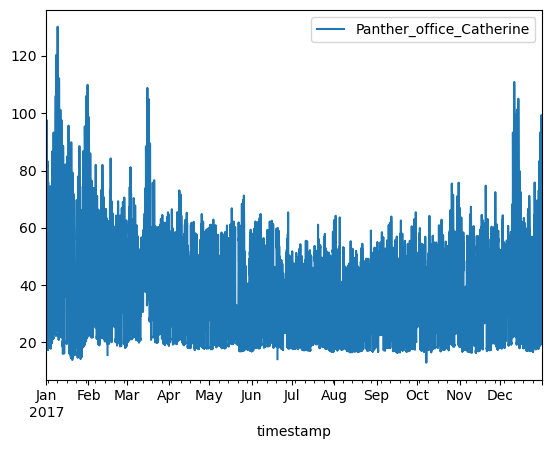

In [11]:
office_data.plot()

In [12]:
weather_data = pd.read_csv(weather_path, index_col='timestamp', parse_dates=True)

In [13]:
weather_data.head()

,site_id,airTemperature,cloudCoverage,dewTemperature,precipDepth1HR,precipDepth6HR,seaLvlPressure,windDirection,windSpeed
timestamp,,,,,,,,,
2016-01-01 00:00:00,Panther,19.4,NaN,19.4,0.0,NaN,NaN,0.0,0.0
2016-01-01 01:00:00,Panther,21.1,6.0,21.1,-1.0,NaN,1019.4,0.0,0.0
2016-01-01 02:00:00,Panther,21.1,NaN,21.1,0.0,NaN,1018.8,210.0,1.5
2016-01-01 03:00:00,Panther,20.6,NaN,20.0,0.0,NaN,1018.1,0.0,0.0
2016-01-01 04:00:00,Panther,21.1,NaN,20.6,0.0,NaN,1019.0,290.0,1.5


In [14]:
weather_site = weather_data[weather_data.site_id == 'Panther'].truncate(before='2017-01-01')

In [16]:
weather_site=weather_site.fillna(method='ffill')

In [17]:
weather_site.head()

,site_id,airTemperature,cloudCoverage,dewTemperature,precipDepth1HR,precipDepth6HR,seaLvlPressure,windDirection,windSpeed
timestamp,,,,,,,,,
2017-01-01 00:00:00,Panther,15.6,2.0,12.8,0.0,NaN,1022.1,130.0,2.1
2017-01-01 01:00:00,Panther,15.0,0.0,12.8,0.0,NaN,1021.7,150.0,1.5
2017-01-01 02:00:00,Panther,15.0,2.0,13.3,0.0,NaN,1021.6,0.0,0.0
2017-01-01 03:00:00,Panther,13.3,0.0,12.2,0.0,NaN,1021.4,0.0,0.0
2017-01-01 04:00:00,Panther,12.2,4.0,11.7,0.0,NaN,1021.4,0.0,0.0


In [18]:
weather_site.shape

(8760, 9)

In [19]:
number_data = weather_site.select_dtypes(include='number')
weather_hourly = number_data.resample("H").mean()



In [20]:
weather_hourly.head()

,airTemperature,cloudCoverage,dewTemperature,precipDepth1HR,precipDepth6HR,seaLvlPressure,windDirection,windSpeed
timestamp,,,,,,,,
2017-01-01 00:00:00,15.6,2.0,12.8,0.0,NaN,1022.1,130.0,2.1
2017-01-01 01:00:00,15.0,0.0,12.8,0.0,NaN,1021.7,150.0,1.5
2017-01-01 02:00:00,15.0,2.0,13.3,0.0,NaN,1021.6,0.0,0.0
2017-01-01 03:00:00,13.3,0.0,12.2,0.0,NaN,1021.4,0.0,0.0
2017-01-01 04:00:00,12.2,4.0,11.7,0.0,NaN,1021.4,0.0,0.0


In [21]:
weather_hourly.shape

(8760, 8)

In [22]:
weather_hourly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2017-01-01 00:00:00 to 2017-12-31 23:00:00
Freq: H
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   airTemperature  8760 non-null   float64
 1   cloudCoverage   8760 non-null   float64
 2   dewTemperature  8760 non-null   float64
 3   precipDepth1HR  8760 non-null   float64
 4   precipDepth6HR  8699 non-null   float64
 5   seaLvlPressure  8760 non-null   float64
 6   windDirection   8760 non-null   float64
 7   windSpeed       8760 non-null   float64
dtypes: float64(8)
memory usage: 615.9 KB


In [24]:
weather_hourly2 = weather_hourly[weather_hourly > -10]


In [25]:
weather_hourly3 = weather_hourly2.fillna(method='ffill')

In [26]:
temperature = weather_hourly3["airTemperature"]

<Axes: xlabel='timestamp'>

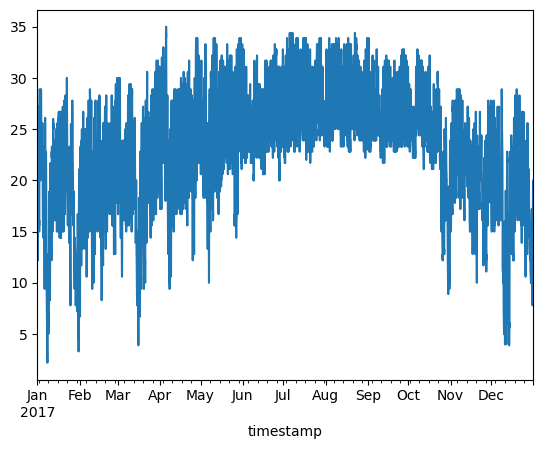

In [27]:
temperature.plot()

In [28]:
training_months = [3,4,5,6,7]
test_months = [8,9]

In [29]:
train = office_data[office_data.index.month.isin(training_months)]
test = office_data[office_data.index.month.isin(test_months)]

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3672 entries, 2017-03-01 00:00:00 to 2017-07-31 23:00:00
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Panther_office_Catherine  3665 non-null   float64
dtypes: float64(1)
memory usage: 57.4 KB


In [31]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1464 entries, 2017-08-01 00:00:00 to 2017-09-30 23:00:00
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Panther_office_Catherine  1464 non-null   float64
dtypes: float64(1)
memory usage: 22.9 KB


In [32]:
train_features = pd.concat([pd.get_dummies(train.index.hour), 
                                     pd.get_dummies(train.index.dayofweek), 
                                     pd.DataFrame(temperature[temperature.index.month.isin(training_months)].values)], axis=1).dropna()

In [33]:
train_features.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,0,1,2,3,4,5,6,0
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,20.6
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,20.0
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,20.0
3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,19.4
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,18.9


In [35]:
train=train.fillna(method='ffill')

In [36]:
model = KNeighborsRegressor().fit(np.array(train_features), np.array(train.values));

In [37]:
test_features = np.array(pd.concat([pd.get_dummies(test.index.hour),
                                    pd.get_dummies(test.index.dayofweek),
                                    pd.DataFrame(temperature[temperature.index.month.isin(test_months)].values)], axis=1).dropna())

In [38]:
predictions = model.predict(test_features)

In [40]:
predicted_vs_actual = pd.concat([test, pd.DataFrame(predictions, index=test.index)], axis=1)

In [41]:
predicted_vs_actual.columns = ["Actual", "Predicted"]

In [42]:
predicted_vs_actual.head()

,Actual,Predicted
timestamp,,
2017-08-01 00:00:00,17.7634,21.06804
2017-08-01 01:00:00,17.7234,18.93964
2017-08-01 02:00:00,18.4035,20.98804
2017-08-01 03:00:00,17.6834,18.58760
2017-08-01 04:00:00,18.0835,18.78764


<Axes: xlabel='timestamp'>

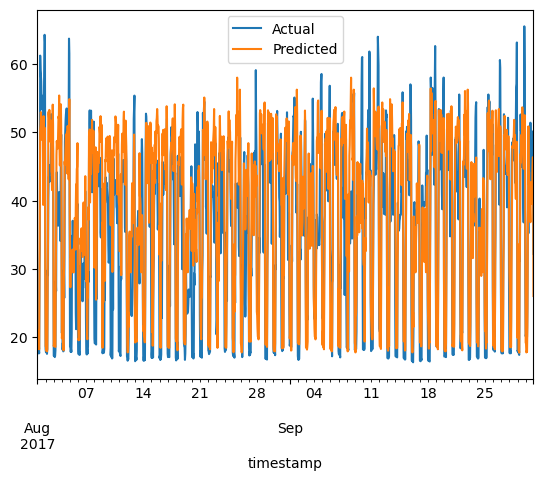

In [43]:
predicted_vs_actual.plot()

In [44]:
train.columns = ["Actual"]

In [45]:
predicted_vs_actual_plus_training = pd.concat([train, predicted_vs_actual], sort=True)

<Axes: xlabel='timestamp'>

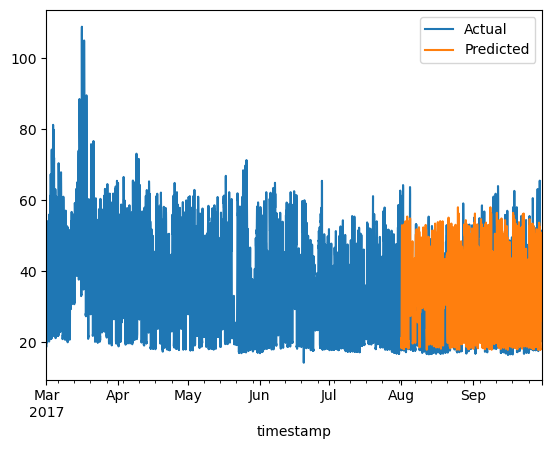

In [46]:
predicted_vs_actual_plus_training.plot()

In [47]:

errors = abs(predicted_vs_actual['Predicted'] - predicted_vs_actual['Actual'])
E = 100 * np.mean((errors / predicted_vs_actual['Actual']))
E

18.516280834725503